# Análise de BI com Insights (Portfólio por: Matheus Amaral da Rocha)

*Visualização inicial dos nossos dados*

In [10]:
import pandas as pd

dados = pd.read_excel('Sample - Superstore.xls')
display(dados.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Ao carregar os dados, observamos que o conjunto possui informações detalhadas sobre pedidos, incluindo colunas como 'Order Date', 'Product Name', 'Sales', 'Quantity' e 'Profit'. ##

-------------------------------------------------------------------------------------------------------------------------------------------------------

# Análise Exploratória dos Dados (EDA)

**Nesta etapa, exploramos os dados para entender melhor suas características e identificar padrões ou anomalias.**

In [11]:
display(dados.info())

display(dados.describe())

display(dados.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

None

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# A análise inicial revela que não há valores nulos no conjunto de dados, indicando uma boa qualidade das informações. Além disso, observamos que a média de 'Sales' é significativamente maior que a de 'Profit', sugerindo que os custos representam uma parcela considerável das vendas.

---------------------------------------------------------------

# Visualização de Dados

**Vamos criar algumas visualizações para obter insights mais profundos.**

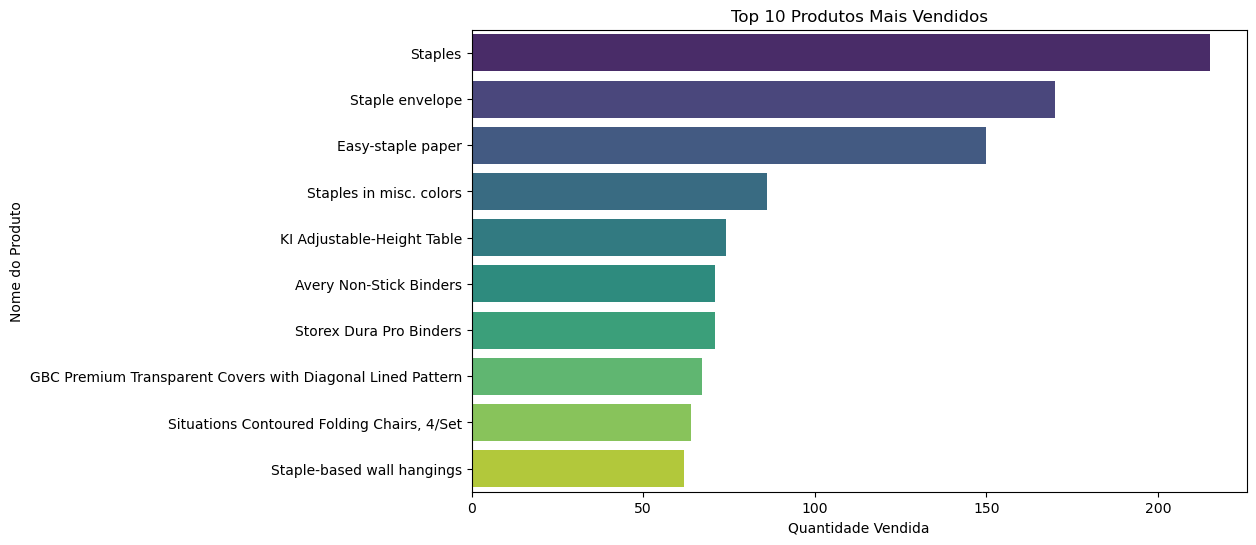

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


produtos_mais_vendidos = dados.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=produtos_mais_vendidos.values, y=produtos_mais_vendidos.index, palette='viridis')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Nome do Produto')
plt.show()

# O gráfico acima destaca os 10 produtos mais vendidos. Observamos que determinados produtos possuem uma demanda significativamente maior, indicando preferência dos clientes por esses itens.

-----------

# Análise Temporal

**Analisaremos as tendências de vendas ao longo do tempo.**

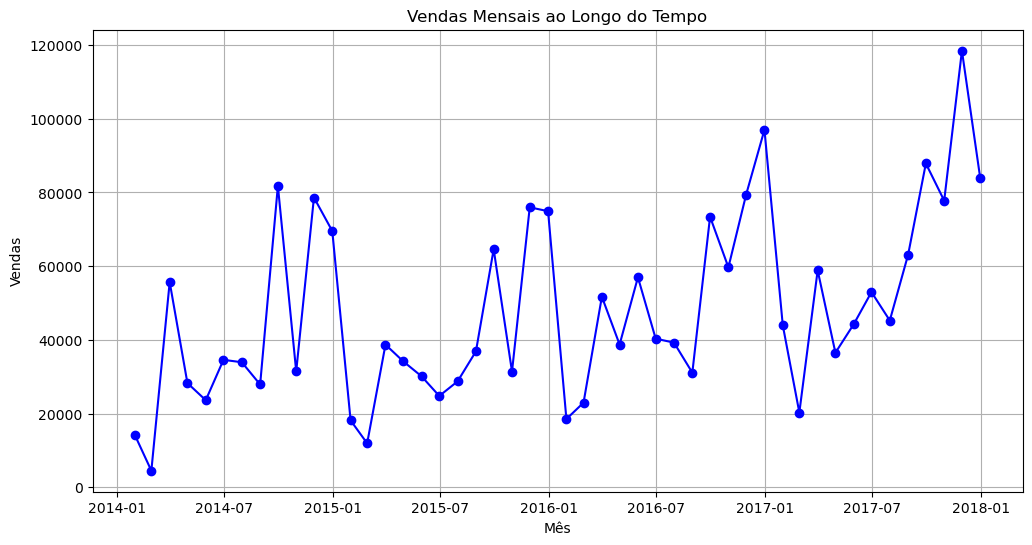

In [13]:
dados['Order Date'] = pd.to_datetime(dados['Order Date'])
vendas_mensais = dados.resample('M', on='Order Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais.values, marker='o', linestyle='-', color='b')
plt.title('Vendas Mensais ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

# A análise temporal revela variações nas vendas mensais, com picos em determinados períodos. Isso pode estar relacionado a sazonalidades ou campanhas promocionais específicas.

---------------------

# Análise de Lucro por Categoria

**Vamos investigar quais categorias de produtos são mais lucrativas.**

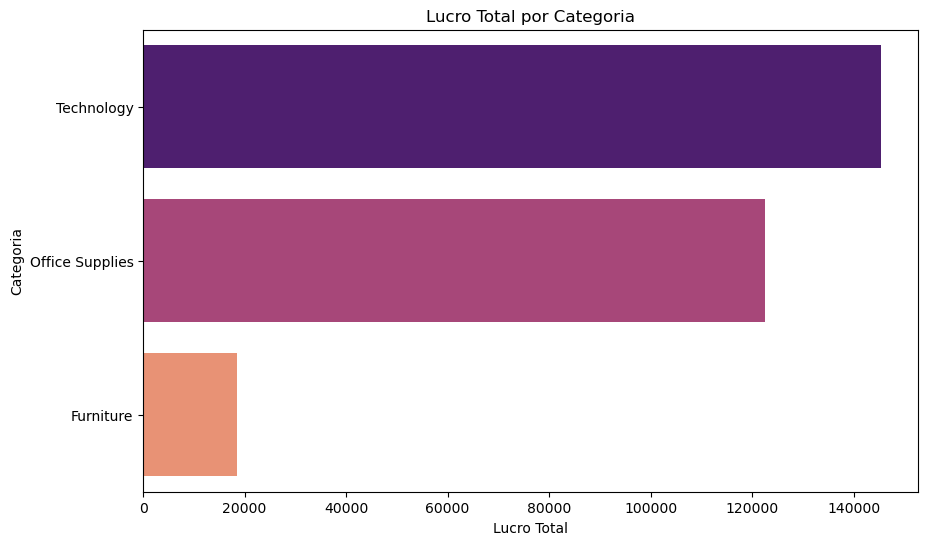

In [14]:
lucro_por_categoria = dados.groupby('Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=lucro_por_categoria.values, y=lucro_por_categoria.index, palette='magma')
plt.title('Lucro Total por Categoria')
plt.xlabel('Lucro Total')
plt.ylabel('Categoria')
plt.show()

# Identificamos que a categoria 'Technology' apresenta o maior lucro total, sugerindo que investimentos em marketing e estoque para esta categoria podem ser particularmente vantajosos.

--------

## Com base nas análises realizadas, podemos concluir que:

## Produtos de destaque: "Determinados produtos possuem uma alta demanda. Investir em estoque e promoção desses itens pode aumentar ainda mais as vendas."
-----
## Variação sazonal: "As vendas apresentam picos em determinados meses. Planejar campanhas promocionais alinhadas a esses períodos pode maximizar os resultados."
-----
## Categorias lucrativas: "A categoria 'Technology' contribui significativamente para o lucro. Focar em estratégias para promover esta categoria pode ser altamente benéfico."
-----